In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('/').join(pth.split('/')[:-1])+"/Utils")
from Utilities import *
import numpy as np
import skimage
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.transform import rotate
from skimage import morphology
import networkx as nx
import json

In [2]:
f1=open(('/').join(pth.split('/')[:-2])+"/Data_Base/validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
#print(linesn[103:])
#linesn=linesn[103:]

linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

dir_origin=('/').join(pth.split('/')[:-2])+'/Data_Base/Imagenes_Originales/'
dir_ROI=('/').join(pth.split('/')[:-2])+'/Data_Base/Sem_Auto/eye_'
dir_meta=('/').join(pth.split('/')[:-2])+'/Data_Base/Metadata_V7G_sckit/'

In [ ]:
name=imgnames[0]
img = io.imread(dir_origin+name)
ROI = io.imread(dir_ROI+name)
mask=assemble_mask(xywh[np.where(imgnames==(name))][0],img,ROI)

for ang in np.arange(0,360,360/6):
    print(ang)
    SD,G,h,edges=get_graph_from_image(img,mask,desired_nodes=20,angle=ang)
    Sampled=sample_central(SD,G,num=5,maxdeg=3)
    NSD={}
    for ID in Sampled:
        NSD[ID]=SD[ID]
    print(NSD)

In [ ]:
img=rotate(img,0)
mask=rotate(mask,0)

In [ ]:
mask=assemble_mask(xywh[np.where(imgnames==(name))][0],img,ROI)

In [ ]:
mask=rotate(mask,180)
np.max(mask)

In [35]:
name=imgnames[1]
img = io.imread(dir_origin+name)
ROI = io.imread(dir_ROI+name)
mask=assemble_mask(xywh[np.where(imgnames==(name))][0],img,ROI)

#SD,G,h,edges=get_graph_from_image(img,mask,desired_nodes=20,angle=0,normalized=False)

In [4]:
SD

{0: {'rgb_mean': array([0.6444832 , 0.51447819, 0.42630745]),
  'rgb_std': array([0.19619582, 0.19409999, 0.1840877 ]),
  'rgb_mo': array([0.74, 0.6 , 0.52]),
  'lab_mean': array([56.82709822,  9.82912679, 17.22523318]),
  'lab_std': array([19.62497522,  6.6959713 ,  6.38551863]),
  'lab_mo': array([0.8 , 0.14, 0.  ]),
  'hsv_mean': array([0.08193052, 0.37460196, 0.64709026]),
  'hsv_std': array([0.09732546, 0.14516403, 0.19427317]),
  'hsv_mo': array([0.06, 0.3 , 0.74]),
  'rgb_per0': array([0., 0., 0.]),
  'rgb_per25': array([0.60392157, 0.41568627, 0.31372549]),
  'rgb_per50': array([0.70980392, 0.57647059, 0.46666667]),
  'rgb_per75': array([0.76470588, 0.64705882, 0.55294118]),
  'rgb_per100': array([1., 1., 1.]),
  'hsv_per0': array([0.        , 0.        , 0.01176471]),
  'hsv_per25': array([0.05769231, 0.27804878, 0.60784314]),
  'hsv_per50': array([0.07062147, 0.3423913 , 0.71372549]),
  'hsv_per75': array([0.08045977, 0.46496815, 0.76470588]),
  'hsv_per100': array([0.9982993

In [ ]:
SD

In [ ]:
img=(img[:,:,0:3]              +np.array([0,0,np.pi]))/np.array([100,(128*(2**0.5)),2*np.pi])

In [ ]:

wth=200
img=ROI
fmw=np.prod(img>wth,axis=2)
wth=100
fmn=np.prod(img<wth,axis=2)
fm=np.logical_or(fmn,fmw)
plt.imshow(fm)

In [ ]:
plt.imshow(img)

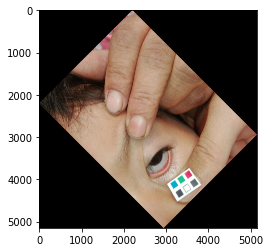

In [10]:
#rotate(img,0,resize=True)
plt.imshow(rotate(img,45,resize=True))

In [31]:
#plt.imshow(st_adjust(img))
img=st_adjust(img)

In [37]:
img

array([[[ 40,  33,  25],
        [ 41,  34,  26],
        [ 43,  36,  28],
        ...,
        [179, 160, 154],
        [177, 158, 152],
        [173, 154, 148]],

       [[ 43,  36,  28],
        [ 43,  36,  28],
        [ 44,  37,  29],
        ...,
        [181, 162, 156],
        [179, 160, 154],
        [175, 156, 150]],

       [[ 45,  38,  30],
        [ 45,  38,  30],
        [ 45,  38,  30],
        ...,
        [185, 166, 162],
        [182, 163, 159],
        [176, 157, 153]],

       ...,

       [[191, 156, 128],
        [190, 155, 127],
        [188, 153, 125],
        ...,
        [146,  83,  65],
        [149,  86,  68],
        [150,  87,  69]],

       [[192, 157, 129],
        [190, 155, 127],
        [187, 152, 124],
        ...,
        [145,  82,  64],
        [144,  81,  63],
        [144,  81,  63]],

       [[191, 156, 128],
        [189, 154, 126],
        [187, 152, 124],
        ...,
        [148,  85,  67],
        [147,  84,  66],
        [147,  84,  66]]

In [19]:
def get_Statistical_Descriptors_(img,mask,n_segments=800,angle=0):
    lum = np.mean(mask,axis=2).astype(int)
    mask1=lum>0

    #img=rotate(img,angle)
    #mask1=rotate(mask1,angle)
    img=rotate(img,angle,resize=True)
    mask1=rotate(mask1,angle,resize=True)

    m_slic = slic(image=img, n_segments=n_segments,sigma=5,slic_zero=True,mask=mask1)
    
    RID=np.unique(m_slic.flatten())
    f=np.zeros((img.shape[0],img.shape[1],3+3+3+3+1))
    f[:,:,0:3]=img[:,:,0:3]
    f[:,:,3:6]=color.rgb2hsv(img)[:,:,0:3]
    f[:,:,6:9]=color.rgb2lab(img)[:,:,0:3]
    LCh=toLCh(img)
    f[:,:,9:12]=LCh[:,:,0:3]
    f[:,:,12]=m_slic
    DIRID={int(i):{'rgb_mean':np.zeros((1)),'rgb_std':np.zeros((1)),'rgb_mo':np.zeros((1)),
                   'lab_mean':np.zeros((1)),'lab_std':np.zeros((1)),'lab_mo':np.zeros((1)),
                   'hsv_mean':np.zeros((1)),'hsv_std':np.zeros((1)),'hsv_mo':np.zeros((1)),
                  } for i in RID}

    v_pack_segments(DIRID,f,RID)
    return DIRID,m_slic

In [42]:
def get_Normalized_Statistical_Descriptors_(img,mask,n_segments=800,angle=0):
    lum = np.mean(mask,axis=2).astype(int)
    mask1=lum>0

    wth=200
    fmw=np.prod(img>wth,axis=2)
    wth=100
    fmn=np.prod(img<wth,axis=2)
    fm=np.logical_or(fmn,fmw)
    img=st_adjust(img)

    img=rotate(img.astype('uint8'),angle,resize=True)
    plt.imshow(img)
    
    mask1=rotate(mask1,angle,resize=True)
    fm=rotate(fm,angle,resize=True)

    m_slic = slic(image=img, n_segments=n_segments,sigma=5,slic_zero=True,mask=mask1)


    RID=np.unique(m_slic.flatten())
    tm_slic=copy.deepcopy(m_slic)


    tm_slic[np.where(fm)]=n_segments+5

    f=np.zeros((img.shape[0],img.shape[1],3+3+3+3+1))
    f[:,:,0:3]=(img[:,:,0:3]+np.array([0,0,0]))/np.array([1,1,1])
    f[:,:,3:6]=(color.rgb2hsv(img)[:,:,0:3]+np.array([0,0,0]))/np.array([1,1,1])
    f[:,:,6:9]=(color.rgb2lab(img)[:,:,0:3]+np.array([0,128,128]))/np.array([100,256,256])
    LCh=toLCh(img)
    f[:,:,9:12]=(LCh[:,:,0:3]+np.array([0,0,np.pi]))/np.array([100,(128*(2**0.5)),2*np.pi])
    f[:,:,12]=tm_slic

    DIRID={int(i):{'rgb_mean':np.zeros((1)),'rgb_std':np.zeros((1)),'rgb_mo':np.zeros((1)),
                   'lab_mean':np.zeros((1)),'lab_std':np.zeros((1)),'lab_mo':np.zeros((1)),
                   'hsv_mean':np.zeros((1)),'hsv_std':np.zeros((1)),'hsv_mo':np.zeros((1)),
                  } for i in RID}

    v_pack_segments(DIRID,f,RID)
    return DIRID,m_slic

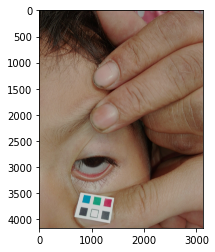

In [43]:
DIRID,mslic=get_Normalized_Statistical_Descriptors_(img,mask,20)
#DIRID,mslic=get_Statistical_Descriptors_(img,mask,20)

In [44]:
DIRID

{0: {'rgb_mean': array([0.56622218, 0.45242573, 0.37354008]),
  'rgb_std': array([0.08124344, 0.09992687, 0.10202486]),
  'rgb_mo': array([0.6 , 0.48, 0.4 ]),
  'lab_mean': array([0.50811711, 0.53391209, 0.56145776]),
  'lab_std': array([0.09303646, 0.02167942, 0.01684475]),
  'lab_mo': array([0.56, 0.52, 0.56]),
  'hsv_mean': array([0.08159433, 0.35875274, 0.56839096]),
  'hsv_std': array([0.09545694, 0.12021438, 0.07568558]),
  'hsv_mo': array([0.06, 0.3 , 0.6 ]),
  'rgb_per0': array([0.        , 0.03529412, 0.03137255]),
  'rgb_per25': array([0.53333333, 0.4       , 0.30980392]),
  'rgb_per50': array([0.58039216, 0.47843137, 0.39215686]),
  'rgb_per75': array([0.61960784, 0.5254902 , 0.44705882]),
  'rgb_per100': array([0.80784314, 0.80392157, 0.80784314]),
  'hsv_per0': array([0.        , 0.        , 0.31372549]),
  'hsv_per25': array([0.06060606, 0.27607362, 0.53333333]),
  'hsv_per50': array([0.0719697 , 0.33116883, 0.58431373]),
  'hsv_per75': array([0.08012821, 0.42957746, 0.62